# Imports

In [17]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

import scipy
from scipy.stats import spearmanr

from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Graphic View

In [2]:
%matplotlib inline
sb.set_style('whitegrid')

# Connection to Data

In [3]:
#Data was cleaned beforehand for this simple example
df = pd.read_csv('dataFinal.csv', sep=';')
df.head(20)

,Reason,Gender,Age,Mobility,Distance,Participation,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,1,1,61.3,0,68.7,0,NaN,NaN,NaN
1,1,1,85.8,1,86.3,0,NaN,NaN,NaN
2,1,0,65.0,0,46.2,1,NaN,NaN,NaN
3,1,0,72.5,0,39.7,0,NaN,NaN,NaN
4,1,1,93.0,0,73.3,0,NaN,NaN,NaN
5,1,0,52.0,1,33.7,1,NaN,NaN,NaN
6,1,0,42.0,1,25.7,1,NaN,NaN,NaN
7,1,1,57.0,1,37.4,1,NaN,NaN,NaN
8,1,1,78.3,0,66.1,0,NaN,NaN,NaN
9,1,0,78.0,1,60.1,1,NaN,NaN,NaN


# Setting variables

In [6]:
Age = df['Age']
Distance = df['Distance']
Gender = df['Gender']
Mobility = df['Mobility']
Reason = df['Reason']
y = df['Participation']

# CHECKING CORRELATION

In [41]:
spearmanr_coefficient, p_value = spearmanr(Age,Distance)
print (spearmanr_coefficient)

0.4213840068700623


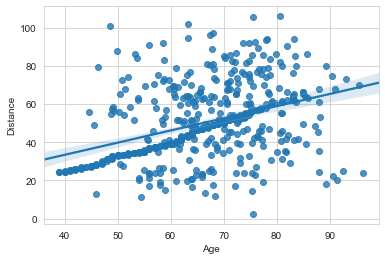

In [42]:
sb.regplot(x=Age, y=Distance, data=df, scatter=True)

In [43]:
# To be done: Point-Biserial index and Phi coeficient

# CHECKING MISSING CELLS

In [44]:
df.isnull().sum()

Reason             0
Gender             0
Age                0
Mobility           0
Distance           0
Participation      0
Unnamed: 6       500
Unnamed: 7       500
Unnamed: 8       500
dtype: int64

In [45]:
# We dont really care of the Unnamed cells, they appered as part of a bug when you change decimal ',' by '.' 
# in excel from an spanish version, and then you export as csv
# We are not using them anyway

# CHECKING IF ORDINAL OR BINARY

We have two binaries and one categorical value

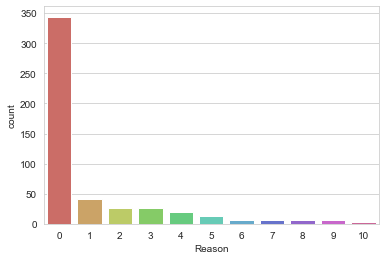

In [46]:
#Categorical Example
sb.countplot(x=Reason, data = df, palette ='hls')

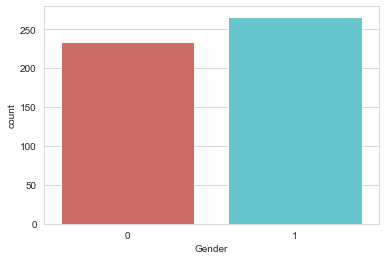

In [47]:
#Binary Example
sb.countplot(x=Gender, data = df, palette ='hls')

# CHECK DATA SET IS SUFFICIENT

In [48]:
#We dont need to  parse the integers or floats for the sake of this exercise
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Reason           500 non-null int64
Gender           500 non-null int64
Age              500 non-null float64
Mobility         500 non-null int64
Distance         500 non-null float64
Participation    500 non-null int64
Unnamed: 6       0 non-null float64
Unnamed: 7       0 non-null float64
Unnamed: 8       0 non-null float64
dtypes: float64(5), int64(4)
memory usage: 35.3 KB


# DEPLOY AND EVALUATE

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df[['Distance', 'Age', 'Mobility','Gender']],y, test_size=0.2)

In [50]:
X_train

,Distance,Age,Mobility,Gender
87,42.4,67.6,1,0
163,65.4,50.4,0,1
140,22.4,90.6,0,0
300,25.7,42.0,0,0
374,38.5,59.0,1,0
...,...,...,...,...
26,50.0,72.6,0,1
205,48.3,67.0,1,0
48,63.4,66.2,1,1
436,41.2,69.8,0,0


In [51]:
y_train

87     0
163    0
140    0
300    1
374    1
      ..
26     0
205    1
48     0
436    0
475    1
Name: Participation, Length: 400, dtype: int64

In [52]:
model = LogisticRegression()

In [53]:
model.fit(X_train,y_train)
model.predict(X_test)
model.score(X_test,y_test)

0.8